In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import xgboost
from sklearn.ensemble import RandomForestRegressor

In [53]:
df_adidas= pd.read_excel(r'C:\Users\Rajat Agrawal\Desktop\DAPA\Adidas US Sales Datasets (1).xlsx')
df_adidas.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [54]:
df_adidas=df_adidas[3:]
df_adidas.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,NaN,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,NaN,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,NaN,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store


In [55]:
df_adidas.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [56]:
df_adidas = df_adidas.drop('Unnamed: 0', axis=1)
df_adidas=df_adidas.rename(columns=df_adidas.iloc[0]).drop(df_adidas.index[0])
df_adidas=df_adidas.sort_values(by='Invoice Date',ascending=True)
df_adidas.drop_duplicates()

In [57]:
df_adidas.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [58]:
df_adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
503,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,206250,61875,0.3,Outlet
8207,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,4399,1407.68,0.32,Outlet
3892,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,47,336,15792,9633.12,0.61,Online
7780,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,34,384,13056,6789.12,0.52,Outlet


In [59]:
encode_col=['Retailer', 'Retailer ID','Region', 'State', 'City','Product','Sales Method']
df_adidas[encode_col] = df_adidas[encode_col].apply(LabelEncoder().fit_transform)
df_adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,1,1,2020-01-01 00:00:00,1,31,35,2,50,1200,600000,300000,0.5,0
503,1,1,2020-01-01 00:00:00,1,37,40,3,75,275,206250,61875,0.3,2
8207,1,1,2020-01-01 00:00:00,1,37,40,3,53,83,4399,1407.68,0.32,2
3892,1,1,2020-01-01 00:00:00,1,31,35,2,47,336,15792,9633.12,0.61,1
7780,1,1,2020-01-01 00:00:00,1,31,35,2,34,384,13056,6789.12,0.52,2


In [60]:
train_col=['Retailer', 'Retailer ID', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin', 'Sales Method']
target_col=['Total Sales']

In [61]:
for i in train_col+target_col:
    df_adidas[i]=df_adidas[i].astype('int')

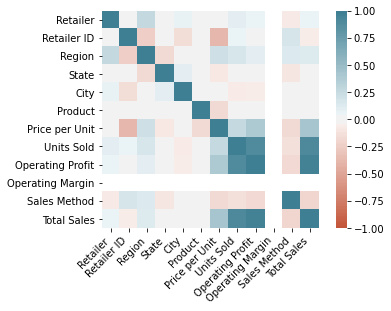

In [62]:
import matplotlib.pyplot as mp
import seaborn as sns
# print(df_train[train_col+target_col].corr())
# dataplot = sb.heatmap(df_train[train_col+target_col].corr(), cmap="YlGnBu", annot=True)
# mp.show()
corr_=df_adidas[train_col+target_col].corr()
# print(corr)
ax = sns.heatmap(
    corr_, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [63]:
df_adidas.shape

(9648, 13)

In [64]:
df_adidas['Invoice_date'] = [d.date() for d in df_adidas['Invoice Date']]
df_adidas['Invoice_time'] = [d.time() for d in df_adidas['Invoice Date']]

In [65]:
import datetime
split_date = datetime.date(2021,6,30)
# df_train=df_adidas[(pd.to_datetime(df_adidas[df_adidas['Invoice_date']]) < split_date)]
# df_train.tail()\
df_train=df_adidas[df_adidas['Invoice_date'] < split_date]
df_test=df_adidas[df_adidas['Invoice_date'] > split_date]

In [66]:
df_train.shape,df_test.shape

((5447, 15), (4197, 15))

In [67]:
corr_plot_df=df_train[train_col+target_col]

In [68]:
# df_train=df_train[train_col]
# df_test=df_test[train_col]

In [69]:
for i in train_col:
    df_train[i]=df_train[i].astype('int')
for i in train_col:
    df_test[i]=df_test[i].astype('int')

<ipython-input-69-223ce9b9c474>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[i]=df_train[i].astype('int')
<ipython-input-69-223ce9b9c474>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[i]=df_test[i].astype('int')


In [121]:
model = RandomForestRegressor(max_depth=7, random_state=43)
# model = RandomForestRegressor()

In [122]:
# model
## Deleating units sold
train_col=['Retailer', 'Retailer ID', 'Region', 'State', 'City',
       'Product',  'Units Sold', 'Operating Profit', 'Operating Margin', 'Sales Method']

In [123]:
df_train[target_col].dtypes

Total Sales    int32
dtype: object

In [124]:
model.fit(df_train[train_col], df_train[target_col].astype('int'))

<ipython-input-124-207b93a03eae>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df_train[train_col], df_train[target_col].astype('int'))


RandomForestRegressor(max_depth=7, random_state=43)

In [125]:
y_pred = model.predict(df_test[train_col])
y_pred

array([  6471.83552805,   2712.66744038, 108219.37416148, ...,
         2430.79203035,   1805.12154348,  51838.40451027])

In [126]:
mean_squared_error(df_test[target_col].astype('int'), y_pred)

744942855.4730393

In [127]:
rms = sqrt(mean_squared_error(df_test[target_col].astype('int'), y_pred))
rms

27293.641301098673

In [128]:
r2_score(df_test[target_col].astype('int'), y_pred)

0.9632587041937255

In [129]:
r2_score(y_pred,df_test[target_col].astype('int'))

0.9579921988622321

In [130]:
from sklearn.metrics import mean_absolute_error
print("MAE :-", mean_absolute_error(df_test[target_col].astype('int'), y_pred))
print("MSE:-",mean_squared_error(df_test[target_col].astype('int'), y_pred))
print("RMSE:-",rms)
print("R2 Score:-",r2_score(y_pred,df_test[target_col].astype('int')))

MAE :- 11678.613015100598
MSE:- 744942855.4730393
RMSE:- 27293.641301098673
R2 Score:- 0.9579921988622321


In [131]:
# import matplotlib.pyplot  as plt
# fig = plt.figure(figsize = (10, 5))
# # plt.plot(df_2020["Month"],df_2020["Avg Deaths"].values,label = "2020",marker='o')
# plt.plot(df_test[target_col].astype('int'),label = "Actual")
# plt.plot(y_pred,label = "Predicted")

# # plt.xlabel("Month")
# # plt.ylabel("AVG Deaths ")
# # plt.title("AVG Deaths in years 2020,2021,2022")
# # plt.legend()
# # plt.show()

In [132]:
df_test["Predicted"]=y_pred
# df_test[target_col].astype('int')
df_test

<ipython-input-132-c96bc7183a6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Predicted"]=y_pred


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Invoice_date,Invoice_time,Predicted
4937,1,1,2021-07-01 00:00:00,0,26,38,3,49,91,4459,2809,0,1,2021-07-01,00:00:00,6471.835528
4207,1,1,2021-07-01 00:00:00,0,12,13,1,43,63,2709,1219,0,1,2021-07-01,00:00:00,2712.667440
319,1,1,2021-07-01 00:00:00,0,12,13,1,45,250,112500,39375,0,2,2021-07-01,00:00:00,108219.374161
1049,1,1,2021-07-01 00:00:00,0,26,38,3,50,350,175000,87500,0,2,2021-07-01,00:00:00,222715.642167
7020,5,1,2021-07-02 00:00:00,0,48,32,3,52,94,4888,2639,0,1,2021-07-02,00:00:00,5650.677220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1,1,2021-12-31 00:00:00,1,37,40,0,70,175,122500,42875,0,2,2021-12-31,00:00:00,110267.909481
4390,1,1,2021-12-31 00:00:00,1,37,40,0,63,47,2961,1362,0,1,2021-12-31,00:00:00,3057.989215
8206,1,1,2021-12-31 00:00:00,1,37,40,0,46,56,2576,1004,0,2,2021-12-31,00:00:00,2430.792030
5092,0,1,2021-12-31 00:00:00,1,18,42,0,52,36,1872,692,0,1,2021-12-31,00:00:00,1805.121543


In [133]:
df_test['Predicted']=df_test['Predicted'].astype('int')
df_test['Predicted']

<ipython-input-133-856cdd9af49e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted']=df_test['Predicted'].astype('int')


4937      6471
4207      2712
319     108219
1049    222715
7020      5650
         ...  
502     110267
4390      3057
8206      2430
5092      1805
1204     51838
Name: Predicted, Length: 4197, dtype: int32

In [134]:
df_test.dtypes

Retailer             int32
Retailer ID          int32
Invoice Date        object
Region               int32
State                int32
City                 int32
Product              int32
Price per Unit       int32
Units Sold           int32
Total Sales          int32
Operating Profit     int32
Operating Margin     int32
Sales Method         int32
Invoice_date        object
Invoice_time        object
Predicted            int32
dtype: object

In [135]:
df_test.to_csv("Result.csv")